<a href="https://colab.research.google.com/github/MichalSlowakiewicz/Machine-Learning/blob/master/Homework4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Homework Assignment: Analyzing and Plotting Bias in Penalized Regression**

-------------------------------

In this assignment, you will explore how **Ridge** and **Lasso** regression introduce **bias** into a model to reduce **variance**, and how the choice of the regularization parameter $\lambda$ affects this trade-off. The goal is to visualize and analyze the **bias-variance trade-off** and understand the conditions under which penalization helps or hinders model performance.

## **The Question**

**How does varying the regularization parameter $\lambda$ in Ridge and Lasso regression impact the trade-off between bias and variance?**

- Generate a synthetic dataset based on a **known** linear relationship:
  
  $$
  y = \beta_0 + \beta_1 x + \ldots + \epsilon
  $$

  where $$\epsilon \sim \mathcal{N}(0, \sigma^2),$$

  use a **high-dimensional** setting (e.g., 50 predictors) with only a few non-zero true coefficients to emphasize the effects of regularization. I stress, the $\beta_i$ coefficients should be known for this experiment and they should be mostly 0, with only a few non-zero parameters.

- Investigate how increasing $\lambda$ influences the model’s **bias**, **variance**, and **Mean Squared Error (MSE)**.
- Plot **Bias²**, **Variance**, and **MSE** on a single graph for both Ridge and Lasso models.
- Explain MSE decomposition into bias and variance. Read more on the MSE decomposition if you need to.

**Does the regularization lead to an optimal trade-off point where MSE is minimized? Explain why this point exists.**




**Expected Outcome:**
 - As $\lambda$ increases:
   - **Bias** increases (the model becomes too simple).
   - **Variance** decreases (the model becomes more stable).
   - **MSE** forms a **U-shape**, revealing the optimal trade-off.

- Analyze how **Ridge** and **Lasso** differ in terms of their bias-variance trade-offs.
- Discuss situations where one method may outperform the other, considering factors like **feature sparsity** and **multicollinearity**.


## **Colab Notebook Requirements**
- Your **Colab notebook** should:
  - Simulate the synthetic dataset and apply Ridge and Lasso regression.
  - Plot **Bias²**, **Variance**, and **MSE** against $\lambda$ for both models.
  - Include a section answering the questions.
  - Be well-documented with comments and explanations for each step.


## **Publish on GitHub**
- Upload your Colab notebook to your **GitHub repository** for this course.
- In your repository’s **README**, include a **link** to the notebook.
- In the notebook include **“Open in Colab”** badge so the notebook can be launched directly from GitHub.


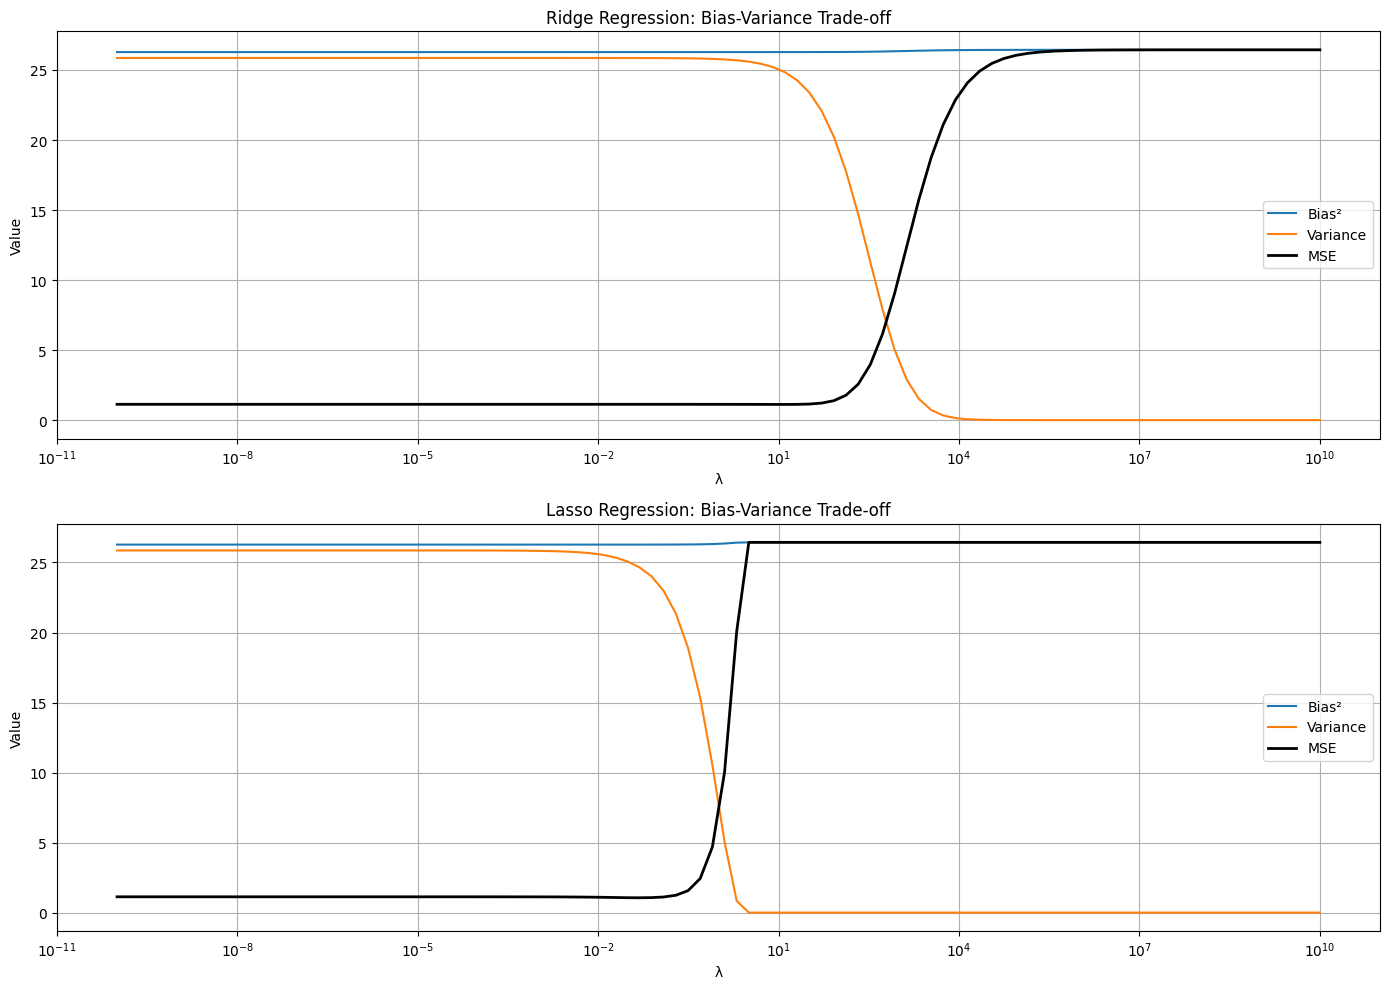

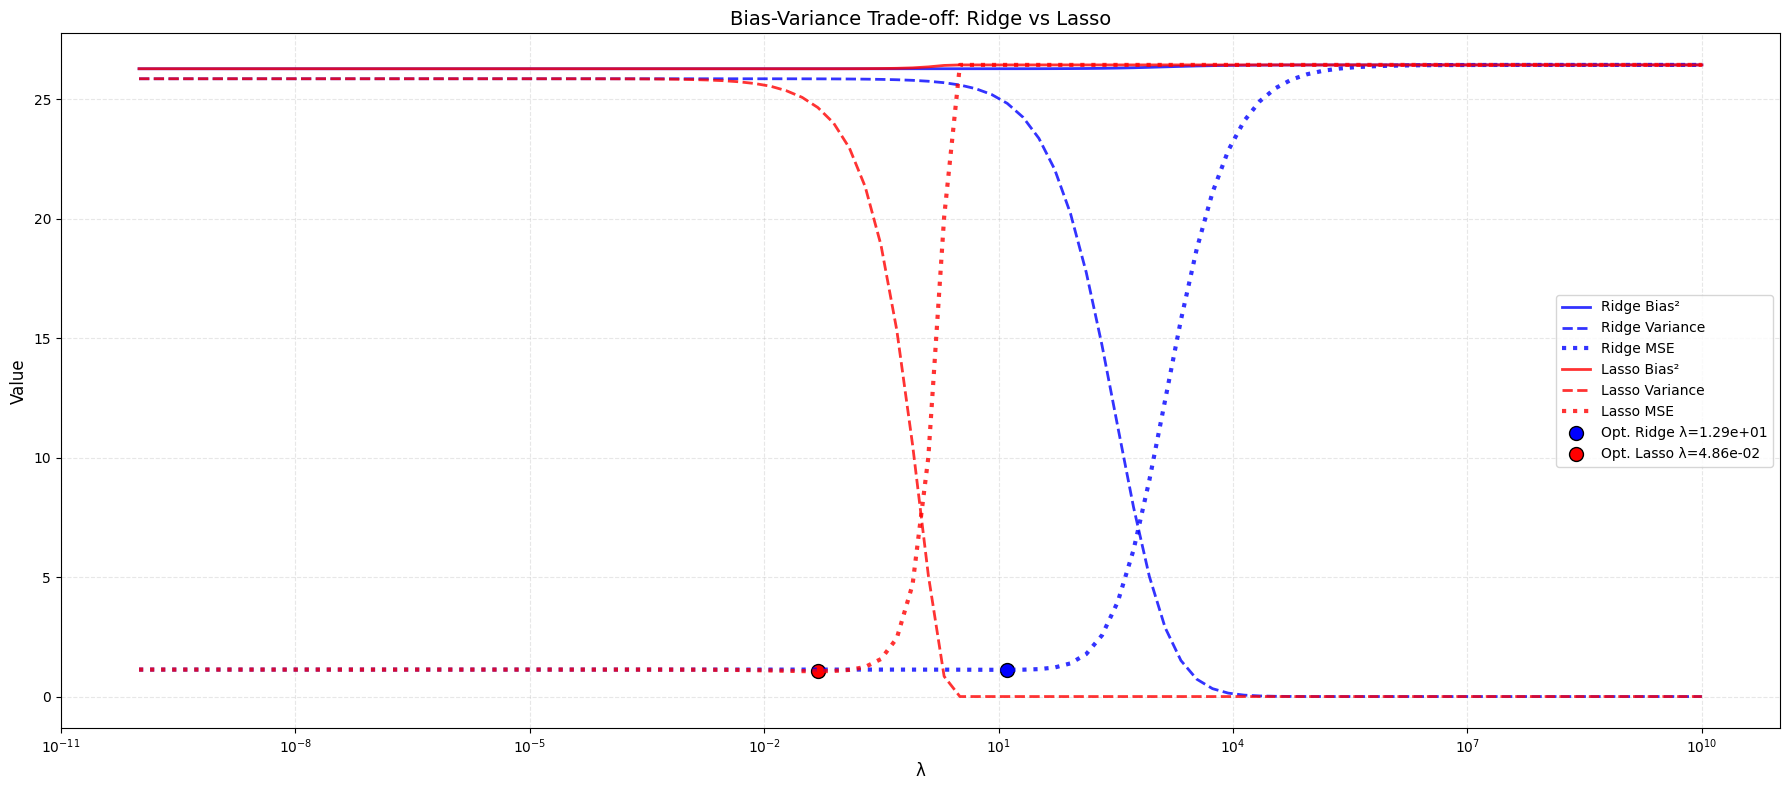

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from mlxtend.evaluate import bias_variance_decomp

### defining functions for calculating variance and bias^2
def bias_variance(model, X_test, y_test):
    predictions = model.predict(X_test)
    bias_squared = np.mean((np.mean(predictions) - y_test)**2)
    variance = np.var(predictions)
    return bias_squared, variance




### generating dataset with desired assumptions
np.random.seed(42)

# size of sample
n = 1000

# generating 50 coefficients
# where only 5 of 50 coefficients aren't equal to 0
real_coefficients = np.zeros(50)
real_coefficients[:5] = np.random.uniform(1, 3, size=5)

# generating n x 50 matrix with numbers from N(0, a) distribution
a = 1
X = np.random.normal(0, a, size=(n, 50))

# generating response vector with random error
y = X @ real_coefficients + np.random.randn(n)

### calculating MSE, bias^2, variance for Lasso and Ridge methods

# set of lambdas
lambdas = np.logspace(-10, 10, 100, base = 10)

mse_lasso = []
bias2_lasso = []
variance_lasso = []

mse_ridge = []
bias2_ridge = []
variance_ridge = []

# splitting dataset into test/train parts
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# calculating MSE, bias^2, variance for Lasso and Ridge for every lambda
for l in lambdas:
  ridge = Ridge(alpha=l)
  lasso = Lasso(alpha=l, max_iter = 10000)

  ridge.fit(X_train, y_train)
  lasso.fit(X_train, y_train)

  ridge_predictions = ridge.predict(X_test)
  lasso_predictions = lasso.predict(X_test)

  # MSE
  mse_ridge.append(mean_squared_error(y_test, ridge_predictions))
  mse_lasso.append(mean_squared_error(y_test, lasso_predictions))

  # variance and bias^2
  bias2ridge, varianceridge = bias_variance(ridge, X_test, y_test)

  bias2lasso, variancelasso = bias_variance(lasso, X_test, y_test)

  variance_ridge.append(varianceridge)
  variance_lasso.append(variancelasso)

  bias2_ridge.append(bias2ridge)
  bias2_lasso.append(bias2lasso)

### plotting section
plt.figure(figsize=(14, 10))

# plotting for Ridge method
plt.subplot(2, 1, 1)
plt.semilogx(lambdas, bias2_ridge, label='Bias²')
plt.semilogx(lambdas, variance_ridge, label='Variance')
plt.semilogx(lambdas, mse_ridge, label='MSE', linewidth=2, color='black')
plt.title('Ridge Regression: Bias-Variance Trade-off')
plt.xlabel('λ')
plt.ylabel('Value')
plt.legend()
plt.grid(True)

# plotting for Lasso method
plt.subplot(2, 1, 2)
plt.semilogx(lambdas, bias2_lasso, label='Bias²')
plt.semilogx(lambdas, variance_lasso, label='Variance')
plt.semilogx(lambdas, mse_lasso, label='MSE', linewidth=2, color='black')
plt.title('Lasso Regression: Bias-Variance Trade-off')
plt.xlabel('λ')
plt.ylabel('Value')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()



# generating one plot for both Lasso and Ridge
plt.figure(figsize=(18, 8))

# Ridge (logaritmic scale)
plt.semilogx(lambdas, bias2_ridge, label='Ridge Bias²',
             color='blue', linestyle='-', linewidth=2, alpha=0.8)
plt.semilogx(lambdas, variance_ridge, label='Ridge Variance',
             color='blue', linestyle='--', linewidth=2, alpha=0.8)
plt.semilogx(lambdas, mse_ridge, label='Ridge MSE',
             color='blue', linestyle=':', linewidth=3, alpha=0.8)

# Lasso (logarytmic scale)
plt.semilogx(lambdas, bias2_lasso, label='Lasso Bias²',
             color='red', linestyle='-', linewidth=2, alpha=0.8)
plt.semilogx(lambdas, variance_lasso, label='Lasso Variance',
             color='red', linestyle='--', linewidth=2, alpha=0.8)
plt.semilogx(lambdas, mse_lasso, label='Lasso MSE',
             color='red', linestyle=':', linewidth=3, alpha=0.8)

# optimal points for Ridge and Lasso (taking point for which MSE is minimized)
optimal_ridge_index = np.argmin(mse_ridge)
optimal_lasso_index = np.argmin(mse_lasso)

# plotting optimal points
plt.scatter(lambdas[optimal_ridge_index], mse_ridge[optimal_ridge_index],
            color='blue', s=100, edgecolor='black',
            label=f'Opt. Ridge λ={lambdas[optimal_ridge_index]:.2e}')
plt.scatter(lambdas[optimal_lasso_index], mse_lasso[optimal_lasso_index],
            color='red', s=100, edgecolor='black',
            label=f'Opt. Lasso λ={lambdas[optimal_lasso_index]:.2e}')

# labels
plt.title('Bias-Variance Trade-off: Ridge vs Lasso', fontsize=14)
plt.xlabel('λ', fontsize=12)
plt.ylabel('Value', fontsize=12)
plt.legend()
plt.grid(True, which="both", linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()

**How does varying the regularization parameter  λ  in Ridge and Lasso regression impact the trade-off between bias and variance?**

Parametr λ ma spory wpływ na zjawisko trade-off pomiędzy obciążeniam, a wariancją dla regresji korzystających z metod Lasso lub Ridge.

Dla Lasso:
  

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.254e-02, tolerance: 1.178e-02
  model = cd_fast.enet_coordinate_descent(


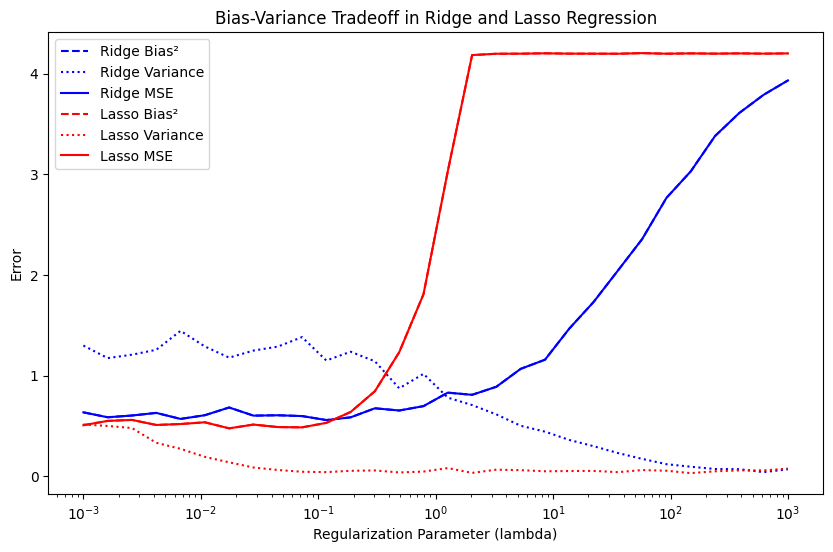

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Set random seed for reproducibility
np.random.seed(42)

# Generate synthetic dataset
n_samples = 100
n_features = 50
n_nonzero = 5  # Number of non-zero coefficients

X = np.random.randn(n_samples, n_features)
true_coeffs = np.zeros(n_features)
true_coeffs[:n_nonzero] = np.random.randn(n_nonzero)  # Only a few non-zero coefficients
y = X @ true_coeffs + np.random.randn(n_samples) * 0.5  # Adding noise

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define range of regularization parameters (lambda values)
lambdas = np.logspace(-3, 3, 30)

# Function to compute bias, variance, and MSE
def compute_bias_variance_mse(model, X_train, y_train, X_test, y_test, lambdas):
    bias_sq, variance, mse = [], [], []

    for alpha in lambdas:
        model.set_params(alpha=alpha)
        predictions = []

        for _ in range(50):  # Multiple trials to estimate variance
            X_train_boot, _, y_train_boot, _ = train_test_split(X_train, y_train, test_size=0.5)
            model.fit(X_train_boot, y_train_boot)
            predictions.append(model.predict(X_test))

        predictions = np.array(predictions)
        mean_pred = np.mean(predictions, axis=0)
        bias_sq.append(np.mean((mean_pred - y_test) ** 2))
        variance.append(np.mean(np.var(predictions, axis=0)))
        mse.append(mean_squared_error(y_test, mean_pred))

    return bias_sq, variance, mse

# Compute for Ridge
ridge = Ridge()
ridge_bias_sq, ridge_variance, ridge_mse = compute_bias_variance_mse(ridge, X_train, y_train, X_test, y_test, lambdas)

# Compute for Lasso
lasso = Lasso()
lasso_bias_sq, lasso_variance, lasso_mse = compute_bias_variance_mse(lasso, X_train, y_train, X_test, y_test, lambdas)

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(lambdas, ridge_bias_sq, label='Ridge Bias²', linestyle='dashed', color='blue')
plt.plot(lambdas, ridge_variance, label='Ridge Variance', linestyle='dotted', color='blue')
plt.plot(lambdas, ridge_mse, label='Ridge MSE', color='blue')

plt.plot(lambdas, lasso_bias_sq, label='Lasso Bias²', linestyle='dashed', color='red')
plt.plot(lambdas, lasso_variance, label='Lasso Variance', linestyle='dotted', color='red')
plt.plot(lambdas, lasso_mse, label='Lasso MSE', color='red')

plt.xscale('log')
plt.xlabel('Regularization Parameter (lambda)')
plt.ylabel('Error')
plt.title('Bias-Variance Tradeoff in Ridge and Lasso Regression')
plt.legend()
plt.show()
